# 1. Introducere: Clasificare în Machine Learning

## 1. Ce este clasificarea?

Clasificarea este o tehnică fundamentală în Machine Learning, utilizată pentru a încadra observațiile într-una dintre două sau mai multe categorii/clase. Este o problemă **supervizată**, ceea ce înseamnă că antrenăm modelul pe un set de date etichetat.

**Exemple comune de clasificare:**
- Clasificarea unui e-mail ca spam sau non-spam.
- Diagnosticarea unei boli (malign vs benign).
- Recunoașterea cifrelor sau literelor.

---

## 2. Clasificare vs. Regresie
Ambele sunt metode de învățare supervizată, dar au scopuri diferite:
- **Clasificarea**: Prevede o **etichetă** (categoriile sunt discrete). Exemplu: malign/benign.
- **Regresia**: Prevede o **valoare numerică continuă**. Exemplu: prețul unei case.

---

## 3. Tipuri de clasificare
1. **Clasificare binară**: Două clase (ex.: 0 și 1).
   - Ex.: Diagnosticul cancerului: malign (0) sau benign (1).
2. **Clasificare multi-clasă**: Mai multe clase (>2).
   - Ex.: Clasificarea tipurilor de flori în setul de date Iris.
3. **Clasificare multi-etichetă**: O observație poate aparține mai multor clase.
   - Ex.: Etichetarea unui document cu mai multe categorii (ex.: sport, politică).

## 4. Problema propusa (Banknote Authentication)
1. **Descriere**: Aceasta problema presupune indentifica intre bancnote autentice si bancnote falsificate plecand de la detalii despre bancnote
2. **Detalii**: Ne vom uita la carecteristici ale imaginilor cu bancnote cum ar fi varianta, asimetrie, entropie
3. **Raspunsul Final**: Vom incerca sa prezicem daca o bancnota este autentica(codificata prin valoarea 1) sau falsificata (codificata prin valoarea 0)

In [2]:
import pandas as pd

In [3]:
# Încărcarea setului de date
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
col_names = ["variance", "skewness", "curtosis", "entropy", "class"]
df = pd.read_csv(url, names=col_names)

In [4]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# 2.Statistica traditionala: Regresia Liniară și Logistică

## 1. Regresia Liniară
Regresia liniară este o metodă care modelează relația dintre o variabilă dependentă (\( y \)) și una sau mai multe variabile independente (\( X \)) folosind o linie dreaptă:
\[
y = wX + b
\]
Unde:
- \( w \): coeficientul de pantă.
- \( b \): interceptul.

**De ce nu este potrivită pentru clasificare?**
- Regresia liniară produce valori continue (\( y \)) care pot fi interpretate greșit ca probabilități.
- Nu este robustă în cazul datelor cu clase bine delimitate (ex.: 0 și 1).

<img src="https://github.com/Oviis24/Banking-Univ-Introduction/blob/main/Imagini/Regresie_Liniara_Puncte.png?raw=1" alt="Exemplu Regresie Puncte" width="500" />

---

<img src="https://github.com/Oviis24/Banking-Univ-Introduction/blob/main/Imagini/Regresie_Liniara.png?raw=1" alt="Exemplu Regresie" width="500" />

## 2. Regresia Logistică
Regresia logistică este o extensie a regresiei liniare pentru clasificare. Utilizează o **funcție sigmoidă** pentru a comprima valorile continue între 0 și 1, astfel încât să poată fi interpretate ca probabilități:
$$
P(y=1|X) = \frac{1}{1 + e^{-(wX + b)}}
$$

**Cum funcționează?**
1. Aplică modelul liniar \( wX + b \).
2. Introduce valoarea rezultată într-o funcție sigmoidă.
3. Clasifică observațiile pe baza unui prag (de obicei \( 0.5 \)):
   -
$$
P(y=1|X) \geq 0.5 \rightarrow \text{Clasa 1 (Pozitivă)}
$$
   -  
$$
P(y=1|X) < 0.5 \rightarrow \text{Clasa 0 (Negativă)}
$$

<img src="https://github.com/Oviis24/Banking-Univ-Introduction/blob/main/Imagini/Regresie_Logistica.png?raw=1" alt="Exemplu Regresie" width="500" />

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(columns='class')
y = df['class']

# Împărțirea datelor în seturi de antrenare și testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
# Antrenarea regresiei logistice
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predicții
y_pred_log = log_reg.predict(X_test)

# Evaluare
print("Acuratețea regresiei logistice:", accuracy_score(y_test, y_pred_log))
print("Matrice de confuzie:\n", confusion_matrix(y_test, y_pred_log))
print("Raport de clasificare:\n", classification_report(y_test, y_pred_log))


Acuratețea regresiei logistice: 0.9878640776699029
Matrice de confuzie:
 [[226   3]
 [  2 181]]
Raport de clasificare:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



## 3. Metrici de evaluare pentru clasificare

## Metrici de evaluare pentru  clasificare

### 1. Acuratețea (Accuracy)
Acuratețea reprezintă proporția predicțiilor corecte din totalul observațiilor:

$$
\text{Acuratețe} = \frac{\text{Număr predicții corecte}}{\text{Număr total observații}}
$$

- **Avantaj:** Ușor de înțeles și aplicat.
- **Limitare:** Nu este potrivită pentru seturi de date dezechilibrate (ex.: 95% clasa 0, 5% clasa 1).




### 2. Matricea de Confuzie
Matricea de confuzie arată numărul de predicții corecte și greșite, separate pe clase. Pentru clasificare binară, aceasta are următoarele componente:
<br>
\
\begin{array}{|c|c|c|}
\hline
 & \text{Clasa reală = 1} & \text{Clasa reală = 0} \\
\hline
\text{Clasa prezisă = 1} & TP (\text{true positive}) & FP (\text{false positive}) \\
\hline
\text{Clasa prezisă = 0} & FN (\text{false negative}) & TN (\text{true negative}) \\
\hline
\end{array}


- **TP**: Observații prezise corect ca pozitive.
- **FP**: Observații prezise greșit ca pozitive.
- **FN**: Observații pozitive ratate.
- **TN**: Observații corect clasificate ca negative.

---

### 3. Precision, Recall și F1-Score

#### **Precision (Precizia)**
Proporția observațiilor prezise ca pozitive care sunt efectiv pozitive:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **Avantaj:** Indică cât de "sigur" este modelul în predicțiile pozitive.


---

#### **Recall (Sensibilitate sau Rata de Detectare)**
Proporția observațiilor pozitive care au fost corect clasificate:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **Avantaj:** Măsoară abilitatea modelului de a detecta toate cazurile pozitive.


---

#### **F1-Score**
Media armonică între Precision și Recall, oferind un echilibru între cele două:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Avantaj:** Este utilă când trebuie să balansezi între Precision și Recall.


In [8]:
log_reg = LogisticRegression(max_iter=10000, C=0.01, solvir='liblinear')
log_reg.fit(X_train, y_train)

# Predicții
y_pred_log = log_reg.predict(X_test)

# Evaluare
print("Acuratețea regresiei logistice:", accuracy_score(y_test, y_pred_log))
print("Matrice de confuzie:\n", confusion_matrix(y_test, y_pred_log))
print("Raport de clasificare:\n", classification_report(y_test, y_pred_log))



Acuratețea regresiei logistice: 0.9733009708737864
Matrice de confuzie:
 [[226   3]
 [  8 175]]
Raport de clasificare:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       229
           1       0.98      0.96      0.97       183

    accuracy                           0.97       412
   macro avg       0.97      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412



## 4. Decision Tree

### 1. Ce este un arbore de decizie?
Un arbore de decizie este un model care structurează datele într-o formă de arbore binar. Fiecare nod interior este o decizie bazată pe o caracteristică, iar fiecare frunză reprezintă o clasă.

---

### 2. Cum funcționează?
1. **Divizare:** Se folosește un criteriu (ex.: Gini sau Entropie) pentru a împărți datele.
2. **Măsuri:**
   - **Gini Index:**<br>
$$
    Gini = 1 - \sum_{i=1}^{n} p_i^2
$$
   - **Entropie:**
$$
     Entropie = -\sum_{i=1}^{n} p_i \cdot \log_2(p_i)
$$
3. **Decizia finală:** Clasele sunt atribuite în funcție de frecvență.

---

### 3. Avantaje și dezavantaje
| **Avantaje**                        | **Dezavantaje**                      |
|-------------------------------------|--------------------------------------|
| Ușor de înțeles și interpretat.     | Sensibil la suprapotrivire (overfitting). |
| Necesită puțină preprocesare.       | Poate fi instabil pentru mici variații ale datelor. |
| Poate gestiona atât date numerice, cât și categorice. | Mai puțin performant pe date complexe. |

<img src="https://github.com/Oviis24/Banking-Univ-Introduction/blob/main/Imagini/Arbore_De_Decizie_Puncte.png?raw=1" alt="Exemplu Regresie" width="700" />

<img src="https://github.com/Oviis24/Banking-Univ-Introduction/blob/main/Imagini/Arbore_De_Decizie_Linii.png?raw=1" alt="Exemplu Regresie" width="700" />

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Crearea și antrenarea modelului
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

# Predicții
y_pred = tree_clf.predict(X_test)

# Evaluare
print("Matricea de Confuzie:\n", confusion_matrix(y_test, y_pred))
print("Raport de Clasificare:\n", classification_report(y_test, y_pred))


Matricea de Confuzie:
 [[224   5]
 [ 18 165]]
Raport de Clasificare:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       229
           1       0.97      0.90      0.93       183

    accuracy                           0.94       412
   macro avg       0.95      0.94      0.94       412
weighted avg       0.95      0.94      0.94       412



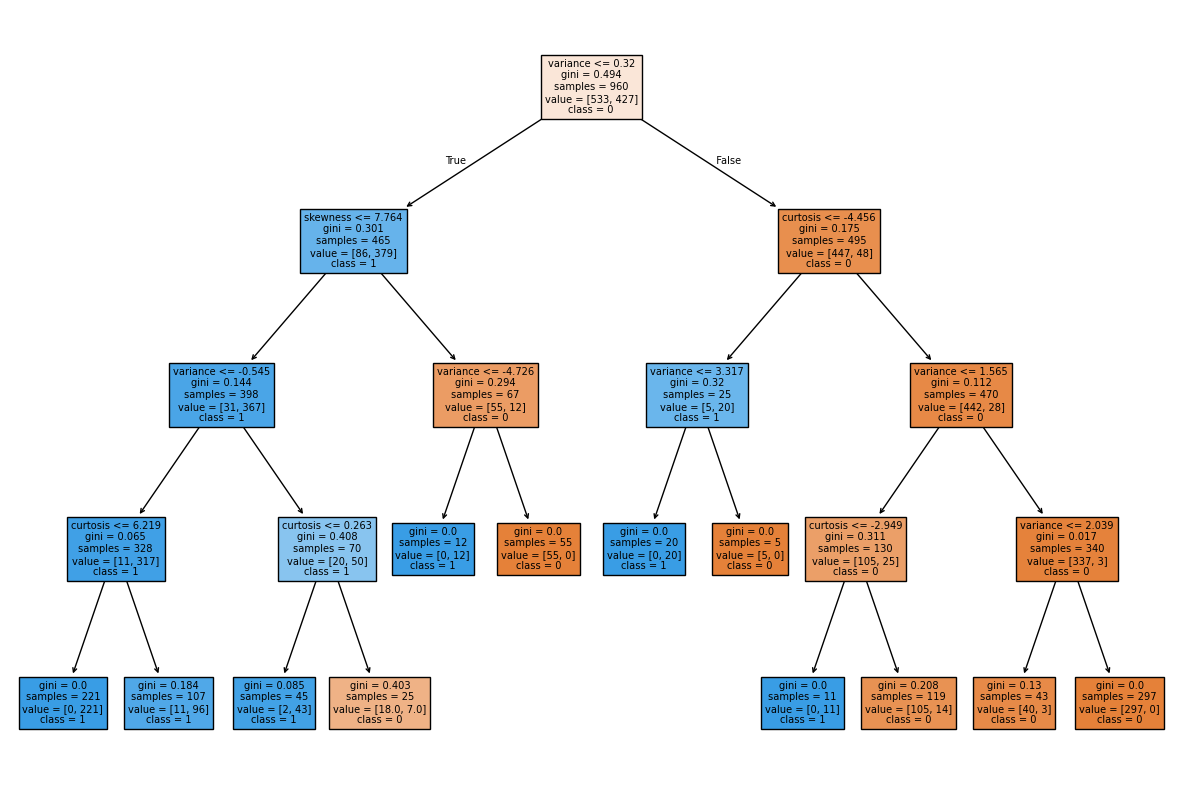

In [21]:
# prompt: vreau un cod care pentru un copac antrenat in tree_clf sa il afisam ca imagine si sa ne uitam la el

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()


## 5. Random Forest

### 1. Ce este Random Forest?
Random Forest este un algoritm de tip **ensemble** care construiește mai mulți arbori de decizie și combină predicțiile acestora. Funcționează prin metoda **bagging**:
1. Fiecare arbore primește un subset diferit al datelor.
2. Predicția finală se bazează pe **votul majoritar** (clasificare) sau **media** (regresie).



### 2. Cum funcționează?
1. **Bootstrap sampling**: Fiecare arbore este antrenat pe un subset aleatoriu de observații.
2. **Împărțiri aleatorii**: La fiecare nod, se selectează un subset aleatoriu de caracteristici.
3. **Agregare**:
   - Clasificare: Votează clasa majoritară.
   - Regresie: Media predicțiilor tuturor arborilor.



### 3. Avantaje și dezavantaje

| **Avantaje**                             | **Dezavantaje**                           |
|------------------------------------------|-------------------------------------------|
| Reduce suprapotrivirea (overfitting).    | Mai lent față de un singur arbore.         |
| Poate gestiona seturi de date complexe.  | Mai dificil de interpretat decât un singur arbore. |
| Robustețe crescută la date zgomotoase.   | Necesită mai multe resurse computaționale. |

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Crearea și antrenarea modelului Random Forest
rf_clf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)
rf_clf.fit(X_train, y_train)

# Predicții
y_pred = rf_clf.predict(X_test)

# Evaluare
print("Matricea de Confuzie:\n", confusion_matrix(y_test, y_pred))
print("Raport de Clasificare:\n", classification_report(y_test, y_pred))


Matricea de Confuzie:
 [[223   6]
 [ 14 169]]
Raport de Clasificare:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       229
           1       0.97      0.92      0.94       183

    accuracy                           0.95       412
   macro avg       0.95      0.95      0.95       412
weighted avg       0.95      0.95      0.95       412

